In [1]:
import pickle
import json 
def load_pickle(path):
    with open(path,'rb') as handle:
        my_dict = pickle.load(handle)
    return my_dict

def save_pickle(path, my_dict):
    with open(path,'wb') as handle:
        pickle.dump(my_dict, handle)

def load_json_dict(path):
    with open(path) as f:
        my_dict = json.load(f)
    return my_dict

In [58]:
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
df = pd.read_csv('../../data/PrimeKG/dti_kg.csv',sep=',')

head_list = df['x_id'].values.tolist()
tail_list = df['end_id'].values.tolist()

C:\Users\Massimo\AppData\Local\Temp\ipykernel_13488\3293751631.py:2: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../../data/PrimeKG/dti_kg.csv',sep=',')


In [3]:
prot_list = []
drug_list = []
for head, tail in zip(head_list,tail_list):
    str_head = str(head)
    str_tail = str(tail)
    if 'DB' in str_head:
        drug_list.append(head)
    else:
        prot_list.append(head)
    if 'DB' in str_tail:
        drug_list.append(tail)
    else:
        prot_list.append(tail)

In [4]:
print(len(prot_list))
print(len(drug_list))
print(drug_list[:100])
print(prot_list[:100])

1335606
5396562
['DB09130', 'DB09130', 'DB09140', 'DB00180', 'DB00240', 'DB00253', 'DB00324', 'DB00394', 'DB00443', 'DB00588', 'DB00591', 'DB00596', 'DB00620', 'DB00635', 'DB00648', 'DB00663', 'DB00687', 'DB00741', 'DB00846', 'DB00860', 'DB00896', 'DB01013', 'DB01047', 'DB01222', 'DB01384', 'DB01410', 'DB05688', 'DB08906', 'DB09124', 'DB13867', 'DB14538', 'DB14539', 'DB14540', 'DB14541', 'DB14542', 'DB14543', 'DB14544', 'DB14631', 'DB14669', 'DB15566', 'DB09479', 'DB00162', 'DB06755', 'DB00163', 'DB00162', 'DB06755', 'DB00162', 'DB03917', 'DB05076', 'DB06755', 'DB06985', 'DB00255', 'DB00279', 'DB00451', 'DB00586', 'DB00861', 'DB01093', 'DB01583', 'DB01645', 'DB01751', 'DB01838', 'DB02179', 'DB02266', 'DB02417', 'DB02698', 'DB02709', 'DB03167', 'DB03239', 'DB03346', 'DB03682', 'DB04474', 'DB04674', 'DB04756', 'DB05235', 'DB05352', 'DB06885', 'DB06907', 'DB06935', 'DB07047', 'DB07176', 'DB07201', 'DB07240', 'DB07282', 'DB07693', 'DB07694', 'DB07695', 'DB07753', 'DB07775', 'DB07962', 'DB0

In [5]:
prot_set = set(prot_list)
drug_set = set(drug_list)
print(len(prot_set))
print(len(drug_set))

36176
7810


In [63]:
path = '../../data/drugbank/db2desc.pkl'
db2desc = load_pickle(path)
not_in_db = []
kg_db2desc = {}
coverage = 0
count_null = 0
not_null_drug_desc = {}
for id in drug_set:
    if id in db2desc:
        coverage +=1
        desc = db2desc[id]
        if desc =='':
            count_null +=1
        if id not in kg_db2desc:
            kg_db2desc[id] = desc
        if desc != '':
            not_null_drug_desc[id] = desc
    else:
        not_in_db.append(id)


In [64]:
print(count_null)
print(len(not_null_drug_desc))

3324
4486


In [8]:
print(kg_db2desc['DB14533'])

zinc chloride is a solution of ions indicated for use in total parenteral nutrition to maintain zinc levels and prevent deficiency syndromes.[l14189]zinc chloride was granted fda approval before 26 june 1986.[l14189]


In [9]:
print(coverage)
path = '../../data/PrimeKG/kg_db2desc.pkl'
#save_pickle(path,kg_db2desc)

7810


In [55]:
#####
####smiles dictionary
path = '../../data/drugbank/DBid2cansmiles.pkl'
db2smiles = load_pickle(path)
kg_db_id2smiles = {}

for id in kg_db2desc.keys():
    if id in db2smiles:
        desc = db2desc[id]
        kg_db_id2smiles[id] = desc


average drug smiles length 225.25765155974102
max drug smiles length 6224
[5844, 674, 209, 45, 19, 4, 1]


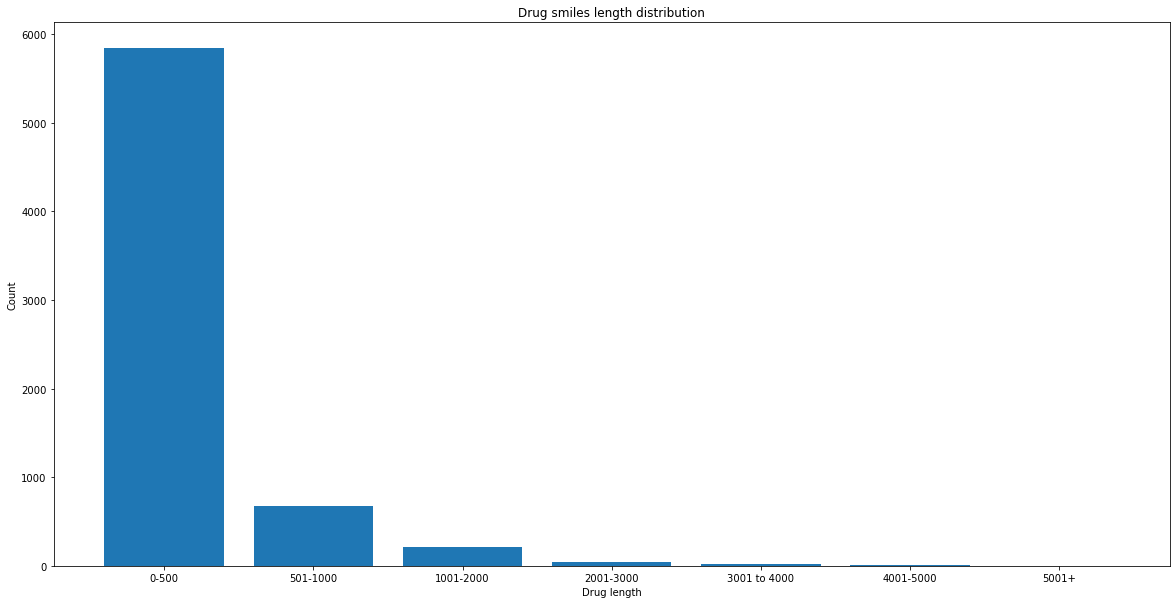

In [57]:
ranges = [0,0,0,0,0,0,0]
smiles_length = []
for smiles in kg_db_id2smiles.values():
    smiles_len = len(smiles)
    smiles_length.append(smiles_len)
    if smiles_len <=500:
        ranges[0] +=1
    elif smiles_len > 500 and smiles_len <=1000:
        ranges[1] +=1
    elif smiles_len > 1000 and smiles_len <= 2000:
        ranges[2] +=1
    elif smiles_len > 2000 and smiles_len <=3000:
        ranges[3] +=1
    elif smiles_len >3000 and smiles_len <= 4000:
        ranges[4] +=1
    elif smiles_len >4000 and smiles_len <= 5000:
        ranges[5] +=1
    else:
        ranges[6] +=1

print("average drug smiles length",sum(smiles_length) / len(smiles_length))
print("max drug smiles length",max(smiles_length))
print(ranges)
x_axis = ['0-500','501-1000','1001-2000','2001-3000','3001 to 4000', '4001-5000','5001+']
plt.rcParams["figure.figsize"] = (20,10)
plt.bar(x_axis,ranges)
plt.xlabel('Drug length')
plt.ylabel('Count')
plt.title('Drug smiles length distribution')

plt.show()
    

In [10]:
length_distribution = {}
length_list = []
for desc in kg_db2desc.values():
    length = len(desc.split())
    length_list.append(length)
    if length not in length_distribution:
        length_distribution[length] = 1
    else:
        length_distribution[length] = length_distribution[length] + 1
print(length_distribution[0])

3324


64.92487739634419
882
[2601, 1101, 574, 120, 41, 30, 19]


Text(0.5, 1.0, 'Drug description length distribution')

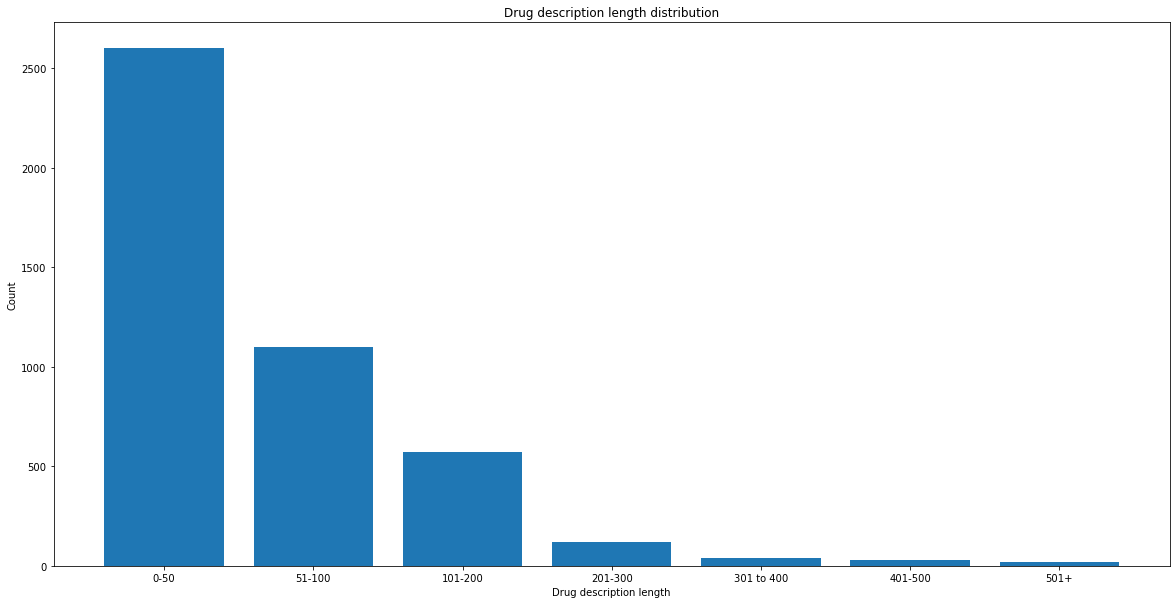

In [66]:
ranges = [0,0,0,0,0,0,0]
drug_desc_len = []
for desc in not_null_drug_desc.values():
    desc_len = len(desc.split())
    drug_desc_len.append(desc_len)
    if desc_len <=50:
        ranges[0] +=1
    elif desc_len > 50 and desc_len <=100:
        ranges[1] +=1
    elif desc_len > 100 and desc_len <= 200:
        ranges[2] +=1
    elif desc_len > 200 and desc_len <=300:
        ranges[3] +=1
    elif desc_len >300 and desc_len <= 400:
        ranges[4] +=1
    elif desc_len >400 and desc_len <= 500:
        ranges[5] +=1
    else:
        ranges[6] +=1

print(sum(drug_desc_len) / len(drug_desc_len))
print(max(drug_desc_len))

print(ranges)
x_axis = ['0-50','51-100','101-200','201-300','301 to 400', '401-500','501+']
plt.rcParams["figure.figsize"] = (20,10)
plt.bar(x_axis,ranges)
plt.xlabel('Drug description length')
plt.ylabel('Count')
plt.title('Drug description length distribution')

In [11]:
print(len(length_list))
print(max(length_list))
print(sum(length_list)/len(length_list))

7810
882
37.292317541613315


In [12]:
path = '../../data/PrimeKG/drug_len_distribution.pkl'
#save_pickle(path,length_distribution)

print(len(length_distribution))
print(length_distribution[882])

import matplotlib.pyplot as plt
x = length_distribution.keys()
y = length_distribution.values()
#plt.bar(x,y)
plt.rcParams["figure.figsize"] = (20,10)
plt.hist(length_list, bins = 100)
plt.xlabel('Description length')
plt.ylabel('Count')
plt.title('Drug length distribution')
plt.show()

PROTEIN START HERE 

In [15]:
path = '../../data/PrimeKG/KG_NCBI2Uniprot.pkl'
kg_ncbi2uni = load_pickle(path)
print(len(kg_ncbi2uni))

20041


In [16]:
path = '../../data/uniprot/uni_id2desc.pkl'
uni_id2desc = load_pickle(path)

In [17]:
kg_ncbi2desc ={}
count_null = 0
for id in prot_set:
    if id in kg_ncbi2uni:
        uni_id = kg_ncbi2uni[id]
        if uni_id in uni_id2desc:
            desc = uni_id2desc[uni_id]
            if desc == '':
                count_null +=1
            kg_ncbi2desc[id] = desc
        else:
            kg_ncbi2desc[id] = ''
            count_null +=1
    else:
        kg_ncbi2desc[id] = ''
        count_null +=1
print(len(kg_ncbi2desc))
print(len(kg_ncbi2desc)-count_null)

36176
14936


In [46]:
####get the sequence 
path = '../../data/uniprot/uni_id2seq.pkl'
uni_id2seq = load_pickle(path)

kg_ncbi2seq = {}
kg_id2desc = {}
not_null_desc = {}
coverage = 0
count_null = 0
for id, uni_id in kg_ncbi2uni.items():
    if uni_id in uni_id2seq:
        seq = uni_id2seq[uni_id]
        kg_ncbi2seq[id] = seq
        coverage+=1
    if uni_id in uni_id2desc:
        desc = uni_id2desc[uni_id]
        if desc == '':
            count_null +=1
        kg_id2desc[id] = desc
        if desc != '':
            not_null_desc[id] = desc

print(len(kg_ncbi2seq))
print(len(kg_id2desc))
print(len(not_null_desc))
print(coverage)
print(count_null)

19992
19992
16681
19992
3311


average sequence length 562.2600040016007
max sequence length 34350
[12026, 5585, 1928, 296, 76, 47, 34]


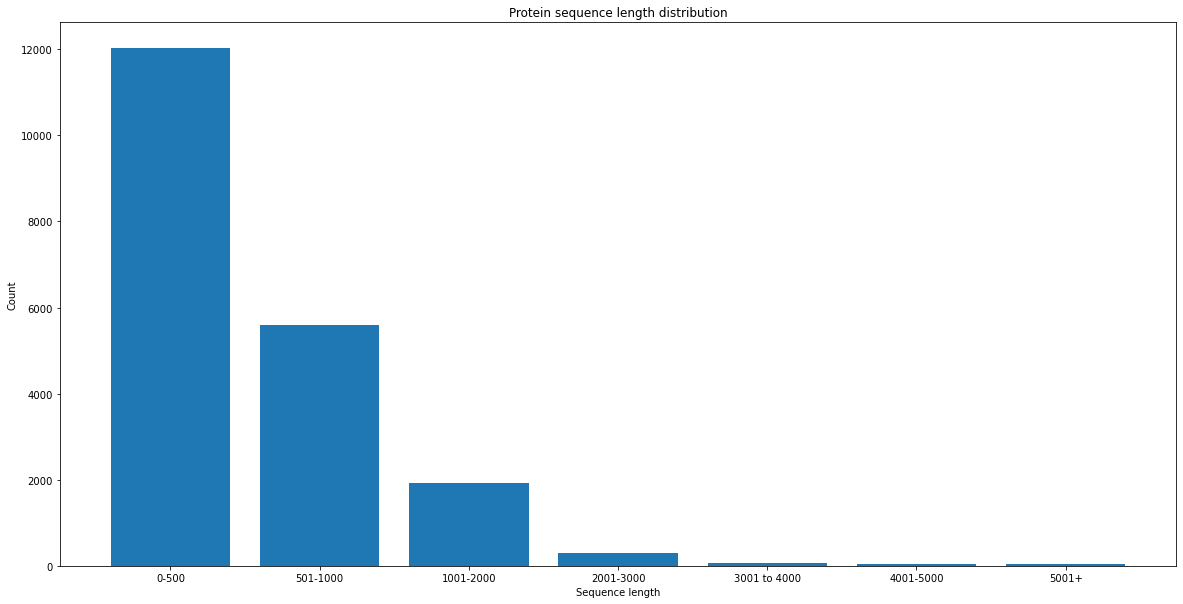

In [51]:
####length of sequence
seq_len_list = []
ranges = [0,0,0,0,0,0,0]
for seq in kg_ncbi2seq.values():
    seq_len = len(seq)
    seq_len_list.append(seq_len)  
    if seq_len <=500:
        ranges[0] +=1
    elif seq_len > 500 and seq_len <=1000:
        ranges[1] +=1
    elif seq_len > 1000 and seq_len <= 2000:
        ranges[2] +=1
    elif seq_len > 2000 and seq_len <=3000:
        ranges[3] +=1
    elif seq_len >3000 and seq_len <= 4000:
        ranges[4] +=1
    elif seq_len >4000 and seq_len <= 5000:
        ranges[5] +=1
    else:
        ranges[6] +=1

print("average sequence length",sum(seq_len_list) / len(seq_len_list))
print("max sequence length",max(seq_len_list))
print(ranges)
x_axis = ['0-500','501-1000','1001-2000','2001-3000','3001 to 4000', '4001-5000','5001+']
plt.rcParams["figure.figsize"] = (20,10)
plt.bar(x_axis,ranges)
plt.xlabel('Sequence length')
plt.ylabel('Count')
plt.title('Protein sequence length distribution')

plt.show()

prot_len_dist = {}
prot_length_list = []
for desc in kg_ncbi2desc.values():
    length = len(desc.split())
    prot_length_list.append(length)
    if length not in prot_len_dist:
        prot_len_dist[length] = 1
    else:
        prot_len_dist[length] = prot_len_dist[length] + 1
        
print(prot_len_dist[0])
print(count_null)
print(len(prot_length_list))

63.15346801750495
1431
[9688, 3810, 2359, 592, 144, 46, 42]


Text(0.5, 1.0, 'Protein description length distribution')

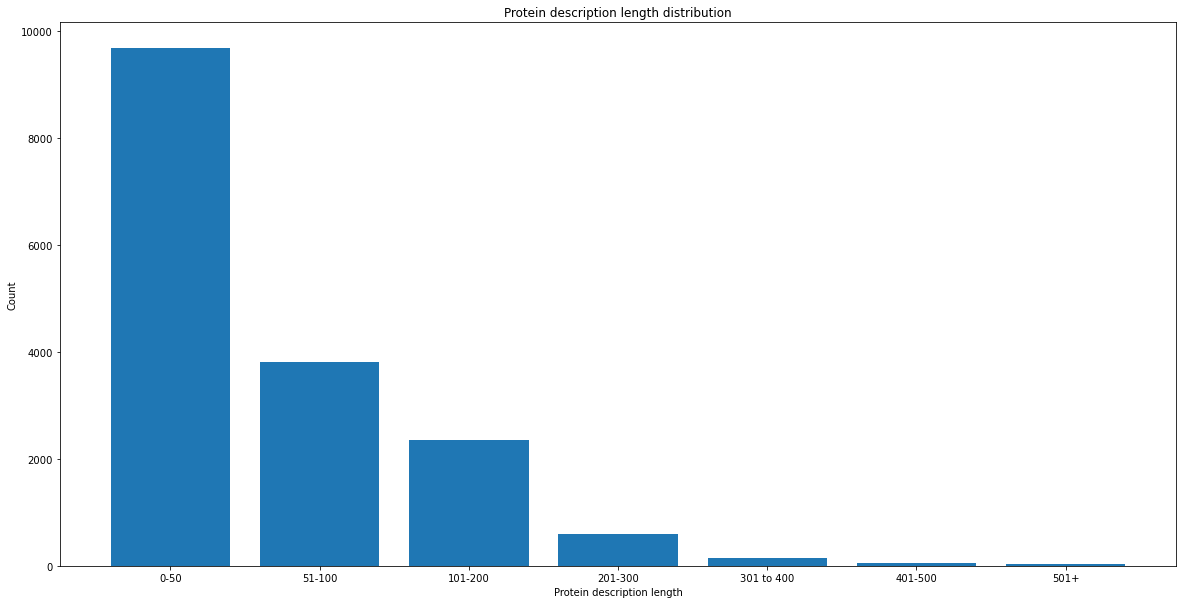

In [62]:

ranges = [0,0,0,0,0,0,0]
prot_desc_len = []
for desc in not_null_desc.values():
    desc_len = len(desc.split())
    prot_desc_len.append(desc_len)
    if desc_len <=50:
        ranges[0] +=1
    elif desc_len > 50 and desc_len <=100:
        ranges[1] +=1
    elif desc_len > 100 and desc_len <= 200:
        ranges[2] +=1
    elif desc_len > 200 and desc_len <=300:
        ranges[3] +=1
    elif desc_len >300 and desc_len <= 400:
        ranges[4] +=1
    elif desc_len >400 and desc_len <= 500:
        ranges[5] +=1
    else:
        ranges[6] +=1

print(sum(prot_desc_len) / len(prot_desc_len))
print(max(prot_desc_len))

print(ranges)
x_axis = ['0-50','51-100','101-200','201-300','301 to 400', '401-500','501+']
plt.rcParams["figure.figsize"] = (20,10)
plt.bar(x_axis,ranges)
plt.xlabel('Protein description length')
plt.ylabel('Count')
plt.title('Protein description length distribution')

x = prot_len_dist.keys()
y = prot_len_dist.values()
#plt.bar(x,y)
plt.rcParams["figure.figsize"] = (20,10)
#plt.bar(x,y)
plt.hist(prot_length_list, bins = 100)
plt.xlabel('Description length')
plt.ylabel('Count')
plt.title('Protein length distribution')
plt.show()

In [48]:
prot_len_list = []
for desc in not_null_desc.values():
    length = len(desc.split())
    prot_len_list.append(length)

In [49]:

print(max(prot_len_list))
print(sum(prot_len_list)/len(prot_len_list))

1431
63.15346801750495


kg_ncbi2desc ={}
for ncbi, uni in kg_ncbi2uni.items():
    if uni in uni_id2desc:
        kg_ncbi2desc[ncbi] = uni_id2desc[uni]
    else:
        kg_ncbi2desc[ncbi] = ''
        
print(len(kg_ncbi2desc))        
###need to do prot list
for id in prot_set:
    if id not in kg_ncbi2desc:
        kg_ncbi2desc[id] = ''
        
        
print(len(kg_ncbi2desc))